Disclaimer
https://krischer.github.io/seismo_live_build/html/Reproducible%20Papers/Syngine_2016/figure_4_earth_models_wrapper.html
This notebook is taken from above link, all the credits goes to their respective owners 
This is just for educational purposes, If I modify somewhere I will mention it

In [4]:
import pandas
import numpy as np
import obspy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use("seaborn-whitegrid")
import requests
# requests is a python module

In [7]:
# Helper function to parse (seprate into components) the model files
def get_model(url):
    data = requests.get(url).text  # requests is a module in python, here it will get the text from whatever url is there and store in the data
    d = []  # empty array
    for line in data.splitlines(): # splitlines = a method which will split the string at linebreaks and outputs the list containing lines of string
        line = line.strip()    # It will remove the spaces from the starting and end of the lines 
        if not line or line.startswith("#"):
             continue
        line = line.split()       # we are now splitting each line into 6 corresponding elements since each line in our model contains 6 parameters
        if len(line) != 6:
             continue
        line = [float(_i) for _i in line]  # here our line variable is a list which contains 6 elements 
        d.append({"depth": (6371000-line[0])/1000.0,"v_p": line[2]/1000.0,"v_s":line[3]/1000.0,"rho":line[2]/1000.0})  
        #now we are appending the data into dictionary. 
    return pandas.DataFrame(d)     # see the example below what kind of thing is returned

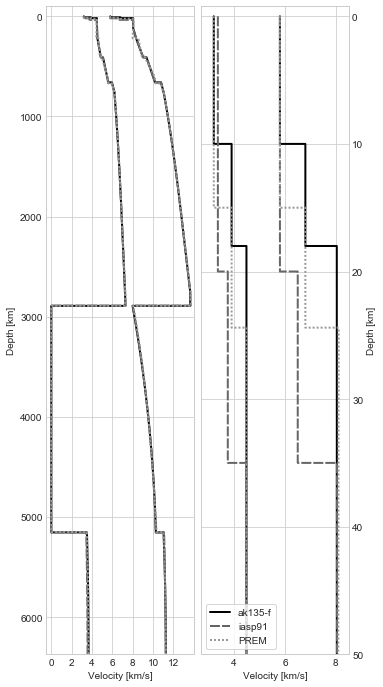

In [14]:
# Download and parse all the 1D models.
ak135f = get_model("http://ds.iris.edu/media/product/emc-syngine/files/1dmodel_ak135f.txt")
prem = get_model("http://ds.iris.edu/media/product/emc-syngine/files/1dmodel_PREMiso.txt")
iasp91 = get_model("http://ds.iris.edu/media/product/emc-syngine/files/1dmodel_iasp91.txt")

# Plotting everything.
fig = plt.figure(figsize=(6,10))

gs1 = gridspec.GridSpec(1, 2, wspace=.05, hspace=0.05, left=0.15, right=0.85, bottom=0.08, top=0.98) # see the matplotlib functions 
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

plt.sca(ax1)
# let's focus on first axis here
plt.plot(ak135f.v_p, ak135f.depth, color="0.0", ls="-", lw=2, label="ak135-F")
plt.plot(ak135f.v_s, ak135f.depth, color="0.0", ls="-", lw=2, label="_nolegend_")

l = plt.plot(iasp91.v_p, iasp91.depth, color="0.4", ls="--", lw=2, label="iasp91")
l[0].set_dashes([5, 1])    # set_dashes is kind of way to set the styles of our lines 
l = plt.plot(iasp91.v_s, iasp91.depth, color="0.4", ls="--", lw=2, label="_nolegend_")
l[0].set_dashes([5, 1])

l = plt.plot(prem.v_p, prem.depth, color="0.6", ls=":", lw=2, label="PREM")
l[0].set_dashes([1, 1])
l = plt.plot(prem.v_s, prem.depth, color="0.6", ls=":", lw=2, label="_nolegend_")
l[0].set_dashes([1, 1])

plt.ylabel("Depth [km]")
plt.xlabel("Velocity [km/s]") 
plt.xticks([0, 2, 4, 6, 8, 10, 12])   # here you can plot the ticks 
plt.ylim(-100, 6371)
plt.xlim(-0.5, 14)
plt.gca().invert_yaxis()  # to invert the y axis shown in the figure below

plt.sca(ax2)

plt.plot(ak135f.v_p, ak135f.depth, color="0.0", ls="-", lw=2, label="ak135-f")
plt.plot(ak135f.v_s, ak135f.depth, color="0.0", ls="-", lw=2, label="_nolegend_")

l = plt.plot(iasp91.v_p, iasp91.depth, color="0.4", ls="--", lw=2, label="iasp91")
l[0].set_dashes([5, 1])
l = plt.plot(iasp91.v_s, iasp91.depth, color="0.4", ls="--", lw=2, label="_nolegend_")
l[0].set_dashes([5, 1])

l = plt.plot(prem.v_p, prem.depth, color="0.6", ls=":", lw=2, label="PREM")
l[0].set_dashes([1, 1])
l = plt.plot(prem.v_s, prem.depth, color="0.6", ls=":", lw=2, label="_nolegend_")
l[0].set_dashes([1, 1])




ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

plt.ylabel("Depth [km]")
plt.xlabel("Velocity [km/s]")
plt.xticks([0, 2, 4, 6, 8])
plt.ylim(-.784806153, 50)
plt.xlim(2.7, 8.5)

plt.gca().invert_yaxis()

legend = plt.legend(loc="lower left", fancybox=True, frameon=True)

plt.savefig("earth_models.pdf")
plt.show()

In [11]:
d = []
d = [{"depth": (6371000-34)/1000.0,"v_p": 39/1000.0,"v_s":900/1000.0,"rho":789/1000.0},{"depth": (6371000-735)/1000.0,"v_p": 612/1000.0,"v_s":912/1000.0,"rho":564/1000.0}]
p = pandas.DataFrame(d)
p

,depth,v_p,v_s,rho
0,6370.966,0.039,0.900,0.789
1,6370.265,0.612,0.912,0.564


In [15]:
p.v_p

0    0.039
1    0.612
Name: v_p, dtype: float64